<a href="https://colab.research.google.com/github/AroraAnshul301/Multi_Threading/blob/main/Assignment_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Threads: 1, Time Taken: 10.44 seconds
Threads: 2, Time Taken: 10.39 seconds
Threads: 4, Time Taken: 8.13 seconds
Threads: 8, Time Taken: 10.06 seconds


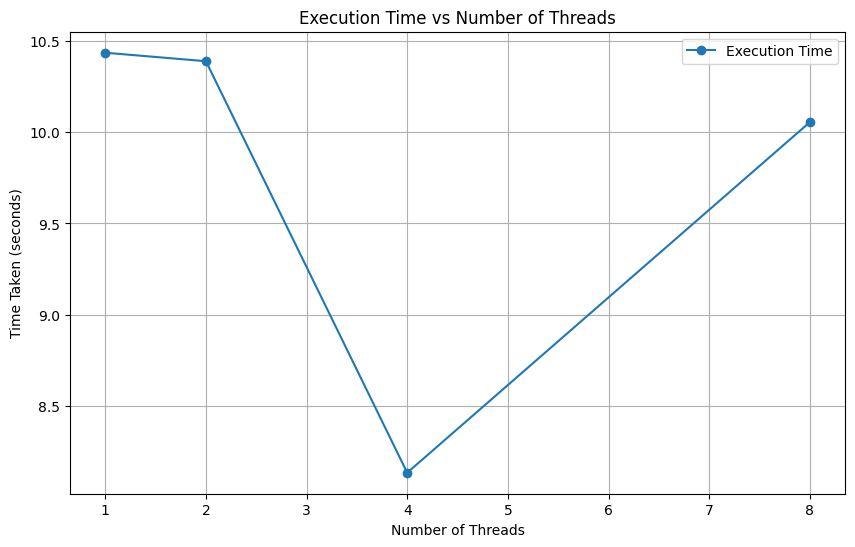

   Threads  Time Taken (s)
0        1       10.435988
1        2       10.389366
2        4        8.133054
3        8       10.055126
Memory Usage: 21.7%
CPU Usage per Core: [18.2, 18.2]


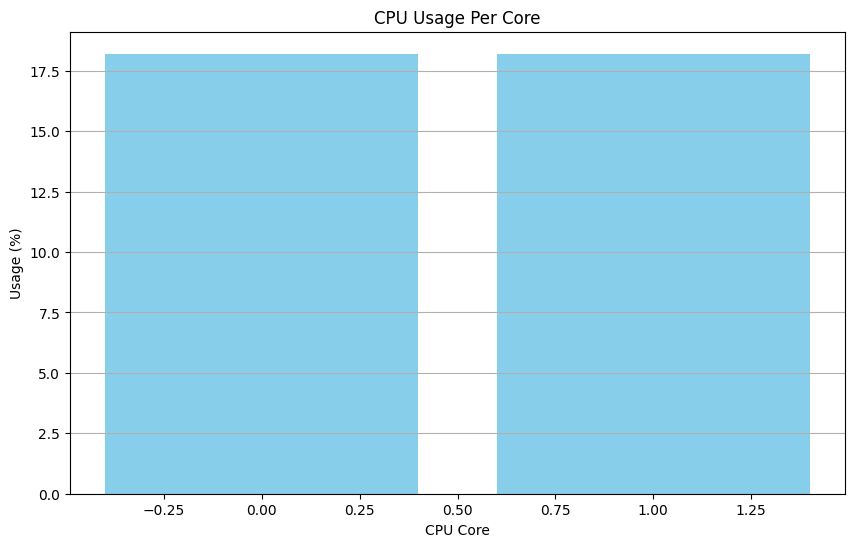

In [1]:
import numpy as np
from concurrent.futures import ThreadPoolExecutor
import time
import psutil
import matplotlib.pyplot as plt
import pandas as pd

def generate_matrices(num_matrices, size):
    for _ in range(num_matrices):
        yield np.random.rand(size, size)

def multiply(matrix, constant_matrix):
    return np.dot(matrix, constant_matrix)

def multiply_matrices_in_batches(num_matrices, constant_matrix, num_threads, size, batch_size):
    start_time = time.time()
    results = []
    matrices = generate_matrices(num_matrices, size)
    for batch_start in range(0, num_matrices, batch_size):
        batch_end = min(batch_start + batch_size, num_matrices)
        batch = [next(matrices) for _ in range(batch_end - batch_start)]
        with ThreadPoolExecutor(max_workers=num_threads) as executor:
            results.extend(executor.map(lambda mat: multiply(mat, constant_matrix), batch))
    end_time = time.time()
    return results, end_time - start_time

num_matrices = 100
matrix_size = 1000
constant_matrix = np.ones((matrix_size, matrix_size))
batch_size = 10
thread_counts = [1, 2, 4, 8]
execution_times = []

for threads in thread_counts:
    _, time_taken = multiply_matrices_in_batches(num_matrices, constant_matrix, threads, matrix_size, batch_size)
    execution_times.append(time_taken)

for t, time_taken in zip(thread_counts, execution_times):
    print(f"Threads: {t}, Time Taken: {time_taken:.2f} seconds")

plt.figure(figsize=(10, 6))
plt.plot(thread_counts, execution_times, marker='o', label='Execution Time')
plt.title("Execution Time vs Number of Threads")
plt.xlabel("Number of Threads")
plt.ylabel("Time Taken (seconds)")
plt.grid(True)
plt.legend()
plt.show()

results_table = pd.DataFrame({
    "Threads": thread_counts,
    "Time Taken (s)": execution_times
})
print(results_table)

memory_usage = psutil.virtual_memory()
cpu_usage = psutil.cpu_percent(interval=0.1, percpu=True)

print(f"Memory Usage: {memory_usage.percent}%")
print(f"CPU Usage per Core: {cpu_usage}")

plt.figure(figsize=(10, 6))
plt.bar(range(len(cpu_usage)), cpu_usage, color='skyblue')
plt.title("CPU Usage Per Core")
plt.xlabel("CPU Core")
plt.ylabel("Usage (%)")
plt.grid(axis='y')
plt.show()
